In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import glob

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def frequencies(df, max_steps=10**7):
    df = df.drop_duplicates()
    
    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

## Figure

In [5]:
columns = ['p_1', 'p_2', 'p_3', 'p_4', 't', 'cooperation']

columns_mem2 = ['p_1', 'p_2', 'p_3', 'p_4',
                'p_5', 'p_6', 'p_7', 'p_8',
                'p_9', 'p_10', 'p_11', 'p_12',
                'p_13', 'p_14', 'p_15', 'p_16',
                't', 'cooperation']


columns_mem3 = [f'p_{i}' for i in range(1, 65)] + ['t', 'cooperation']

In [6]:
costs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [7]:
memory_one_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_one_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_one_coops.append(coops)

In [8]:
memory_two_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns_mem2) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_two_coops.append(coops)

In [9]:
memory_one_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_one_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_one_counting_coops.append(coops)

In [14]:
memory_two_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns_mem2) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_two_counting_coops.append(coops)

In [11]:
memory_three_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_three_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_three_counting_coops.append(coops)

In [15]:
linestyles = ["-o", "--o", ":o"]

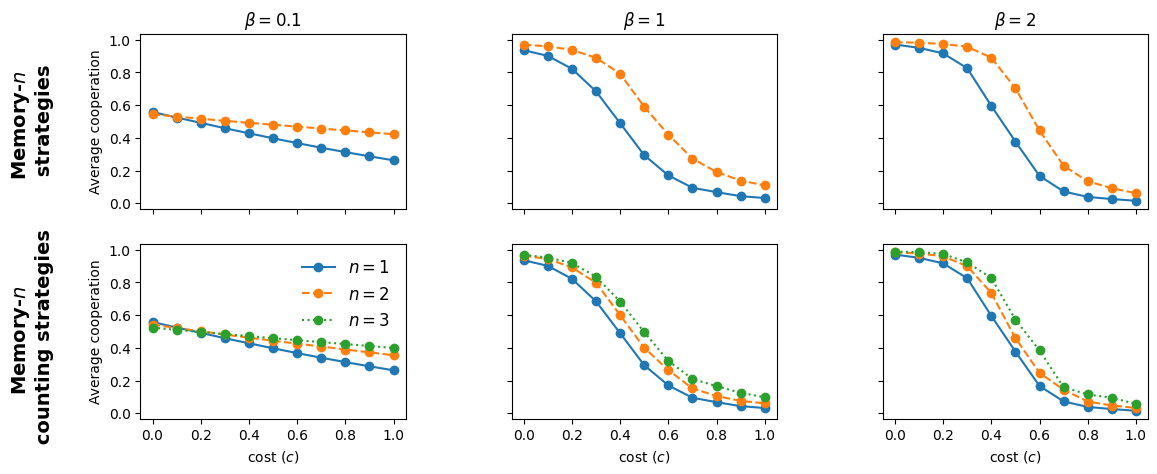

In [16]:
fig, axes = plt.subplot_mosaic("ABC;DEF",
                               figsize=(13, 5),
                               gridspec_kw = {'height_ratios':[1, 1], "wspace": 0.4},
                               sharex=True,
                               sharey=True,
                               )

axes['A'].set_title(r'$\beta=0.1$');
axes['B'].set_title(r'$\beta=1$');
axes['C'].set_title(r'$\beta=2$');

# axes['A'].set_ylim(0, 1)

for letter in ["A", "D"]:
    axes[letter].set_ylabel("Average cooperation")
    
    
# for letter in ["D", "E", "F"]:
#     axes[letter].set_xlabel("population size ($N$)")
    

for coop, letter in zip(memory_one_coops, ["A", "B", "C"]):
    axes[letter].plot(costs, coop, linestyles[0])
    
for coop, letter in zip(memory_two_coops, ["A", "B", "C"]):
    axes[letter].plot(costs, coop, linestyles[1])
    
for coop, letter in zip(memory_one_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[0], label='$n=1$')
    
for coop, letter in zip(memory_two_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[1], label="$n=2$")
    
for coop, letter in zip(memory_three_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[2], label="$n=3$")
    axes[letter].set_xlabel("cost ($c$)")
    
axes['D'].legend(fontsize=12, frameon=False)
    
axes['A'].text(-.5, .15, "Memory-$n$ \n strategies",
               rotation=90,
               fontsize=14,
               fontweight='bold',
               horizontalalignment='center');

axes['D'].text(-.5, -.2, "Memory-$n$ \n counting strategies",
               rotation=90,
               fontsize=14,
               fontweight='bold',
               horizontalalignment='center');

fig.savefig("../figures/siFigMemorySim.pdf", bbox_inches="tight")

## Looking into strategies to verify we can retrieve the results of Memory-$n$ strategies PNAS paper

In [123]:
import os

In [143]:
beta = 2;

folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_{beta}_cost_"

In [144]:
files = [folder + f"{c}.csv" for c in costs]

In [145]:
for file in files:
    os.rename(file, file.replace("two", "three"))

In [146]:
memory_three_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_three_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns_mem3) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_three_counting_coops.append(coops)

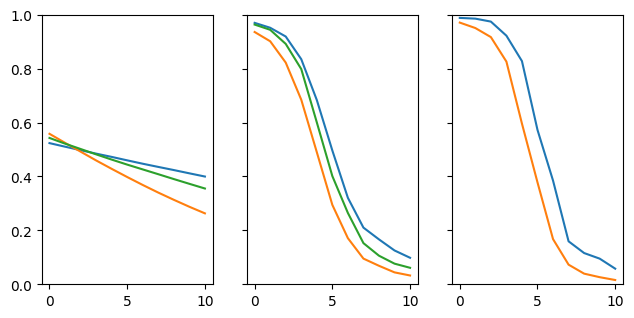

In [157]:
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(7.5, 3.5))

axes[0].plot(memory_three_counting_coops[0]);
axes[0].plot(memory_one_counting_coops[0]);
axes[0].plot(memory_two_counting_coops[0]);

axes[1].plot(memory_three_counting_coops[1]);
axes[1].plot(memory_one_counting_coops[1]);
axes[1].plot(memory_two_counting_coops[1]);

axes[2].plot(memory_three_counting_coops[2]);
axes[2].plot(memory_one_counting_coops[2]);

axes[0].set_ylim(0, 1);

In [111]:
beta = 0.1;

folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_{beta}_cost_"

# files = [folder + f"{c}.csv" for c in costs]

# dfs = [pd.read_csv(file, names=columns_mem2) for file in files]

# dfs = [frequencies(df, max_steps=10**7) for df in dfs]

# coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]

In [112]:
files

['../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.1.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.2.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.3.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.4.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.5.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.6.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.7.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.8.csv',
 '../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_0.1_cost_0.9.csv',
 '../src/evolution_sim

In [94]:
costs

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [106]:
columns_mem2

['p_1',
 'p_2',
 'p_3',
 'p_4',
 'p_5',
 'p_6',
 'p_7',
 'p_8',
 'p_9',
 'p_10',
 'p_11',
 'p_12',
 'p_13',
 'p_14',
 'p_15',
 'p_16',
 't',
 'cooperation']

In [107]:
pd.read_csv(files[0], header=None)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,0.613584,0.321721,0.748969,0.842184,0.321721,0.545525,0.310282,0.574788,0.748969,0.842184,...,0.594761,0.750710,0.252472,0.775671,0.750710,0.424247,0.775671,0.001791,35,0.295441
2,0.719440,0.163060,0.555678,0.622872,0.163060,0.651980,0.839745,0.805998,0.555678,0.622872,...,0.363905,0.663207,0.994164,0.254819,0.663207,0.852276,0.254819,0.180909,37,0.602881
3,0.505100,0.339708,0.828409,0.458473,0.339708,0.777164,0.685340,0.535398,0.828409,0.458473,...,0.220211,0.273133,0.253936,0.137610,0.273133,0.992386,0.137610,0.070528,41,0.383789
4,0.518645,0.145509,0.216775,0.862875,0.145509,0.719919,0.626701,0.987186,0.216775,0.862875,...,0.756909,0.419258,0.090202,0.026277,0.419258,0.727350,0.026277,0.612245,55,0.609682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
99996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
99997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
99998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000


In [96]:
top = dfs[3].sort_values("frequencies").tail(10)

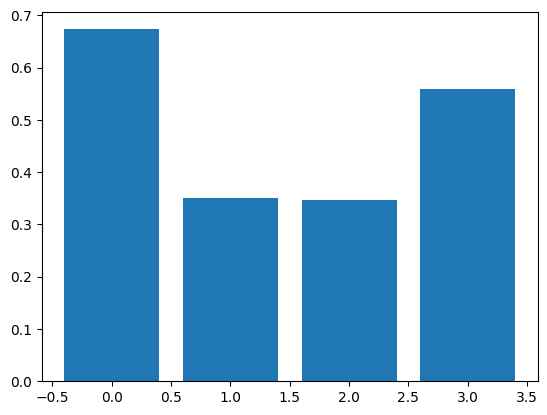

In [97]:
plt.bar(range(4), [top[i].mean() for i in ['p_1', 'p_2', 'p_3', 'p_4']]);

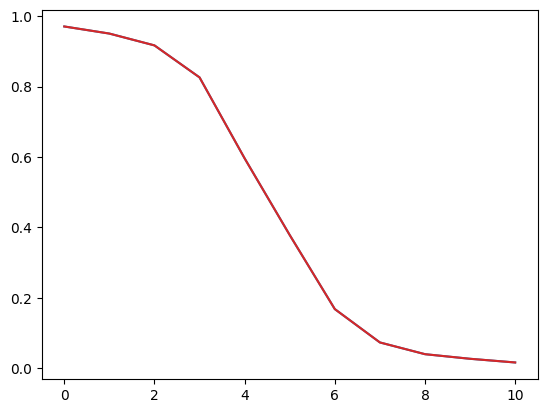

In [65]:
plt.plot(memory_one_coops[2], color= 'tab:blue');

plt.plot(memory_one_counting_coops[2], color= 'tab:red');